# Showcase zero shot transfer learning with CLIP model

In [ ]:
# Install the CLIP library
!pip install git+https://github.com/openai/CLIP.git

In [ ]:
import zipfile
import os

# Path to the zip file and extraction directory
zip_path = '/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification.v2-raw.folder.zip'
extract_dir = '/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification'

# Create directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents of the extracted directory
os.listdir(extract_dir)

['test', 'train', 'valid', 'README.roboflow.txt', 'README.dataset.txt']

In [ ]:
import torch
import clip
from PIL import Image
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from pathlib import Path

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return preprocess(image).unsqueeze(0).to(device)

# Selecting a few sample images from each set (train, valid, test)
sample_images = []
folders = ['train', 'valid', 'test']
for folder in folders:
    folder_path = Path(extract_dir) / folder
    for subfolder in folder_path.iterdir():
        if subfolder.is_dir():
            for image_file in subfolder.glob('*.jpg'):
                sample_images.append(image_file)
                if len(sample_images) >= 5:  # Limit to 5 images for demonstration
                    break
        if len(sample_images) >= 5:
            break
    if len(sample_images) >= 5:
        break

# Load and preprocess images
preprocessed_images = torch.cat([load_and_preprocess_image(img) for img in sample_images])

sample_images, preprocessed_images.shape

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 197MiB/s]


([PosixPath('/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/4694730335_2553e77aa5_z_jpg.rf.002452d264f83328488dee76276b8879.jpg'),
  PosixPath('/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/5665838969_fe217988b9_m_jpg.rf.0232b8170fd6e168c342bf5d0926d792.jpg'),
  PosixPath('/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/9054268881_19792c5203_n_jpg.rf.01f095c09f80e48d472c2df615a401ed.jpg'),
  PosixPath('/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/34661399476_9ea7e2fd53_n_jpg.rf.028428b56df5c7c9da2fd5956e9d8e5a.jpg'),
  PosixPath('/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/14816364517_2423021484_m_jpg.rf.029a00849e5dd4966744d890252fc979.jpg')],
 torch.Size([5, 3, 224, 224]))

In [ ]:
import torch

# Define the text prompts
text_prompts = ["a photo of a daisy", "a photo of a rose", "a photo of a tulip", "a photo of a sunflower", "a photo of a lily"]

# Tokenize and encode the text prompts
text_inputs = clip.tokenize(text_prompts).to(device)

# Encode images and text using the CLIP model
with torch.no_grad():
    image_features = model.encode_image(preprocessed_images)
    text_features = model.encode_text(text_inputs)

# Compute similarity (cosine similarity is commonly used here)
similarities = (image_features @ text_features.T).softmax(dim=-1)

# Get the top predictions
predicted_labels = [text_prompts[i] for i in similarities.argmax(dim=1)]

print(predicted_labels)


['a photo of a daisy', 'a photo of a daisy', 'a photo of a daisy', 'a photo of a daisy', 'a photo of a daisy']


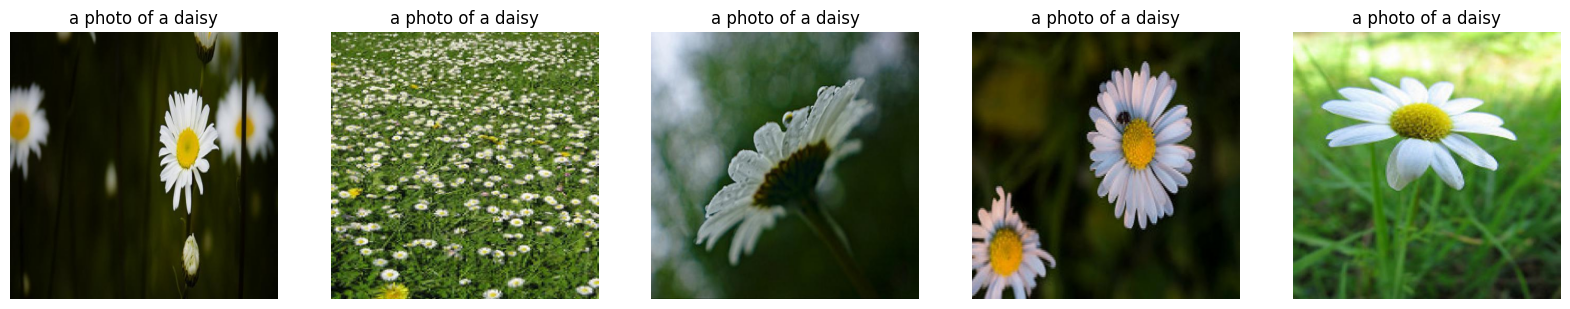

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image file paths from your earlier message
image_paths = [
    "/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/4694730335_2553e77aa5_z_jpg.rf.002452d264f83328488dee76276b8879.jpg",
    "/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/5665838969_fe217988b9_m_jpg.rf.0232b8170fd6e168c342bf5d0926d792.jpg",
    "/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/9054268881_19792c5203_n_jpg.rf.01f095c09f80e48d472c2df615a401ed.jpg",
    "/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/34661399476_9ea7e2fd53_n_jpg.rf.028428b56df5c7c9da2fd5956e9d8e5a.jpg",
    "/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/train/daisy/14816364517_2423021484_m_jpg.rf.029a00849e5dd4966744d890252fc979.jpg"
]
predicted_labels = ['a photo of a daisy', 'a photo of a daisy', 'a photo of a daisy', 'a photo of a daisy', 'a photo of a daisy']

# Plot each image with its predicted label
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, img_path, label in zip(axes, image_paths, predicted_labels):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.show()

# Showcase transfer learning using state of art models from tfhub

In [ ]:
!pip install -q tensorflow tensorflow-hub

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/drive/MyDrive/Sem2/CMPE258(DL)/Assignment 7/Flowers_Classification/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    data_dir + 'train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    data_dir + 'valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 1275 images belonging to 2 classes.
Found 364 images belonging to 2 classes.


In [ ]:
import tensorflow_hub as hub

# Load BiT model
bit_model_url = "https://tfhub.dev/google/bit/m-r50x1/1"
model = tf.keras.Sequential([
    hub.KerasLayer(bit_model_url, trainable=True),  # Set trainable to True to fine-tune the entire model
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.build([None, 128, 128, 3])  # Specify the input shape
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23500352  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23504450 (89.66 MB)
Trainable params: 23504450 (89.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator)

Epoch 1/10
40/40 [==============================] - 485s 11s/step - loss: 3.7549 - accuracy: 0.5169 - val_loss: 0.6873 - val_accuracy: 0.5522
Epoch 2/10
40/40 [==============================] - 424s 11s/step - loss: 0.7123 - accuracy: 0.5302 - val_loss: 0.6871 - val_accuracy: 0.5522
Epoch 3/10
40/40 [==============================] - 425s 11s/step - loss: 0.7254 - accuracy: 0.5388 - val_loss: 0.8614 - val_accuracy: 0.4478
Epoch 4/10
40/40 [==============================] - 427s 11s/step - loss: 0.7309 - accuracy: 0.5176 - val_loss: 0.7734 - val_accuracy: 0.5522
Epoch 5/10
40/40 [==============================] - 434s 11s/step - loss: 0.7928 - accuracy: 0.5286 - val_loss: 0.6909 - val_accuracy: 0.5522
Epoch 6/10
40/40 [==============================] - 424s 11s/step - loss: 0.6809 - accuracy: 0.5765 - val_loss: 0.6874 - val_accuracy: 0.5522
Epoch 7/10
40/40 [==============================] - 430s 11s/step - loss: 0.6500 - accuracy: 0.6212 - val_loss: 0.4605 - val_accuracy: 0.8159
Epoch 

In [ ]:
val_loss, val_acc = model.evaluate(valid_generator)
print(f"Validation accuracy: {val_acc * 100:.2f}%")

# Save the model
model.save('/content/drive/MyDrive/Trained_Models/flower_classifier_model.h5')

12/12 [==============================] - 32s 3s/step - loss: 0.3670 - accuracy: 0.8791
Validation accuracy: 87.91%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
